In [24]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

###  <font color="cyan"><i>Log Transform</i></font>

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/SumanGouda/Scikit-Learn-/refs/heads/main/Feature%20Engineering/Data%20Extraction/laptops_new.csv')

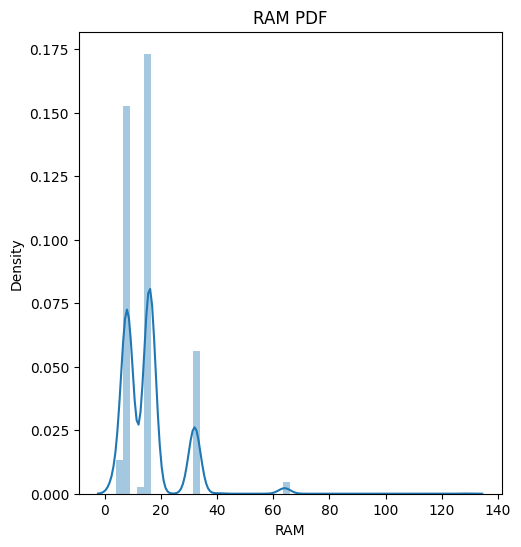

In [42]:
req_df = df[['RAM', 'Final Price', 'release_year', 'Storage', 'Laptop']]
req_df['release_year'] = pd.to_numeric(req_df['release_year'], errors='coerce')

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(req_df['RAM'])
plt.title('RAM PDF')
plt.show()

In [36]:
req_df.columns

Index(['RAM', 'Final Price', 'release_year', 'Storage', 'Laptop'], dtype='object')

##### As the above data is right skewed so we will apply the log transformation on RAM column.

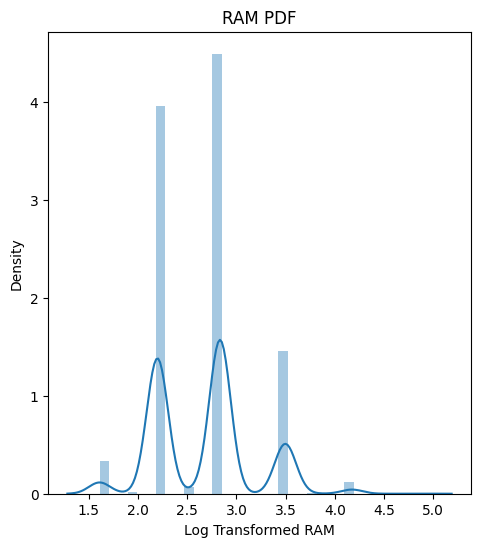

In [29]:
from sklearn.preprocessing import FunctionTransformer

trf1 = FunctionTransformer(np.log1p)
transformed_array = trf1.fit_transform(req_df['RAM'].values.reshape(-1, 1))

transformed_ram_df = pd.DataFrame(transformed_array, columns=['Log Transformed RAM'])

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(transformed_ram_df['Log Transformed RAM'])
plt.title('RAM PDF')
plt.show()

###  <font color="Yellow"><i>Square Transform</i></font>

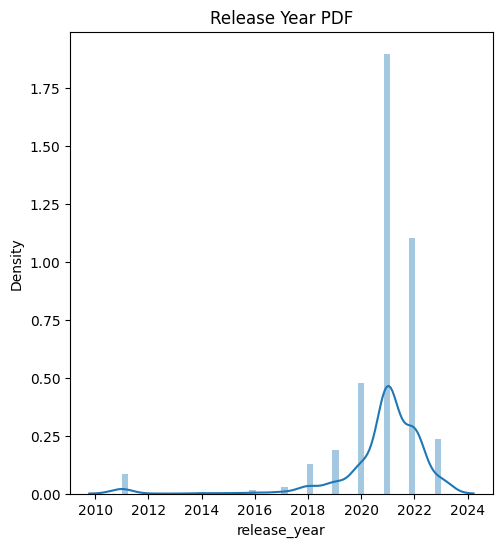

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(req_df['release_year'])
plt.title('Release Year PDF')
plt.show()

#### The above data is left skewed data so we will gonna apply srqare transform in it. 

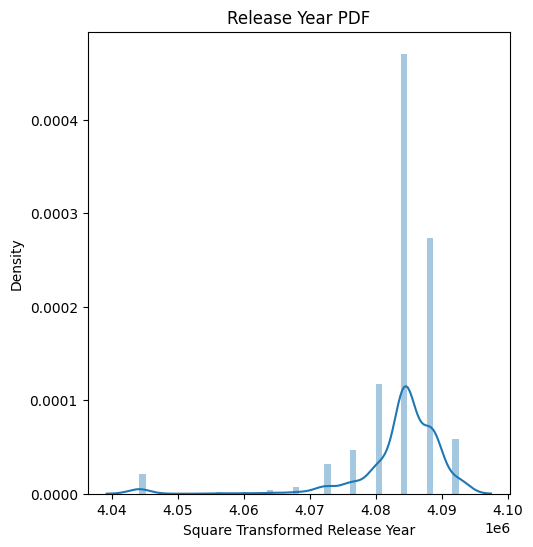

In [ ]:
trf2 = FunctionTransformer(np.square)
transformed_array = trf2.fit_transform(req_df['release_year'].values.reshape(-1, 1))

transformed_release_year_df = pd.DataFrame(transformed_array, columns=['Square Transformed Release Year'])

plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.distplot(transformed_release_year_df['Square Transformed Release Year'])
plt.title('Release Year PDF')
plt.show()

###  <font color="orange"><i>Box Cox & Yeo-Johnson Power Transform</i></font>

In [6]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/SumanGouda/Scikit-Learn-/refs/heads/main/DATA%20PROCESSING/Data%20Extraction/Copy%20of%20US%20Superstore%20data.csv')
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
columns_to_drop = [
    'Row ID', 'Order ID', 'Order Date', 'Ship Date',
    'Ship Mode', 'Customer ID', 'Customer Name',
    'Segment', 'Country', 'City', 'State', 'Postal Code',
    'Region', 'Product ID', 'Category', 'Sub-Category',
    'Product Name'
]
# Before Power Transformation
df = df.drop(columns = columns_to_drop, errors='ignore')
df.head()


,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


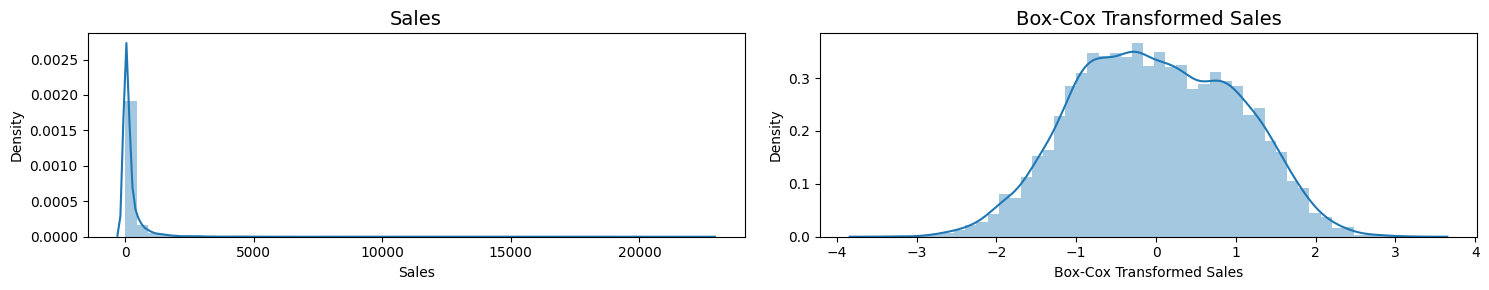

In [68]:
# Create a figure with two subplots
plt.figure(figsize=(15, 3))

# Plot the original sales distribution on the first subplot
plt.subplot(1, 2, 1)
sns.distplot(df['Sales'])
plt.title('Sales', fontsize=14)

# After Power Transformation
pt = PowerTransformer(method='box-cox')
pt.fit(df['Sales'].values.reshape(-1, 1))
transformed_array = pt.transform(df['Sales'].values.reshape(-1, 1))
transformed_sales_df = pd.DataFrame(transformed_array, columns=['Box-Cox Transformed Sales'])

# Plot the transformed sales distribution on the second subplot
plt.subplot(1, 2, 2)
sns.distplot(transformed_sales_df['Box-Cox Transformed Sales'])
plt.title('Box-Cox Transformed Sales', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [71]:
df['Discount'].describe()

count    9994.000000
mean        0.156203
std         0.206452
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount, dtype: float64

Text(0.5, 1.0, 'Yeo-Johnson Transformed Discount')

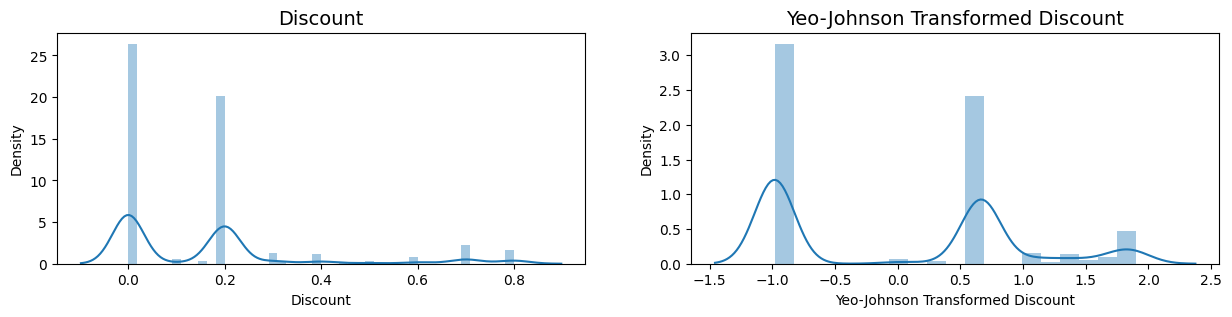

In [73]:
# Create a figure with two subplots
plt.figure(figsize=(15, 3))

# Plot the original sales distribution on the first subplot
plt.subplot(1, 2, 1)
sns.distplot(df['Discount'])
plt.title('Discount', fontsize=14)

# After Power Transformation
pt = PowerTransformer(method='yeo-johnson')
pt.fit(df['Discount'].values.reshape(-1, 1))
transformed_array = pt.transform(df['Discount'].values.reshape(-1, 1))
transformed_discount_df = pd.DataFrame(transformed_array, columns=['Yeo-Johnson Transformed Discount'])

# Plot the transformed sales distribution on the second subplot
plt.subplot(1, 2, 2)
sns.distplot(transformed_discount_df['Yeo-Johnson Transformed Discount'])
plt.title('Yeo-Johnson Transformed Discount', fontsize=14)

Text(0.5, 1.0, 'Transformed Discount')

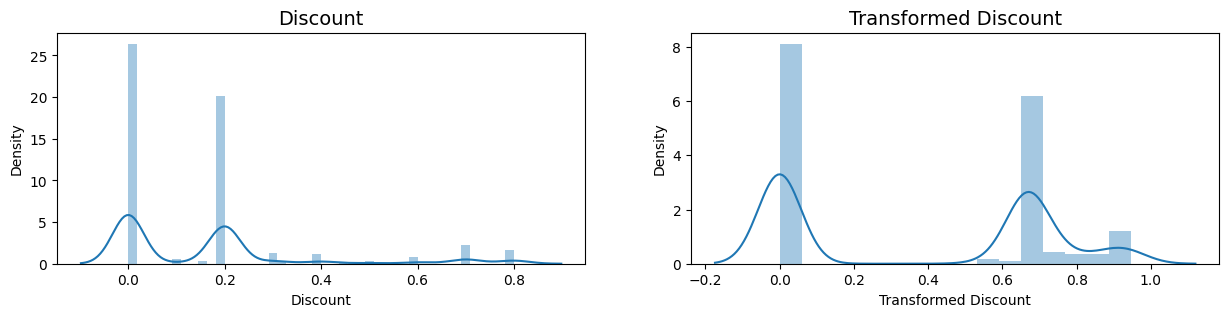

In [80]:
# Create a figure with two subplots
plt.figure(figsize=(15, 3))

# Plot the original sales distribution on the first subplot
plt.subplot(1, 2, 1)
sns.distplot(df['Discount'])
plt.title('Discount', fontsize=14)

# Applying Log Transform to Discount column
log_trf = FunctionTransformer(lambda x: np.power(x, 1/4))
log_trf.fit(df['Discount'].values.reshape(-1, 1))

transformed_array = log_trf.transform(df['Discount'].values.reshape(-1, 1))
transformed_discount_df = pd.DataFrame(transformed_array, columns=['Transformed Discount'])

# Plot the transformed sales distribution on the second subplot
plt.subplot(1, 2, 2)
sns.distplot(transformed_discount_df['Transformed Discount'])
plt.title('Transformed Discount', fontsize=14)

In [ ]:
df.head()

## Column Descriptions

### Patient Data

| Column Name | Description |
| --- | --- |
| `id` | Unique id for each patient |
| `age` | Age of the patient in years |
| `origin` | Place of study |
| `sex` | Male/Female |
| `cp` | Chest pain type (typical angina, atypical angina, non-anginal, asymptomatic) |
| `trestbps` | Resting blood pressure (in mm Hg on admission to the hospital) |
| `chol` | Serum cholesterol in mg/dl |
| `fbs` | Fasting blood sugar > 120 mg/dl (True/False) |
| `restecg` | Resting electrocardiographic results (normal, stt abnormality, lv hypertrophy) |
| `thalach` | Maximum heart rate achieved |
| `exang` | Exercise-induced angina (True/False) |
| `oldpeak` | ST depression induced by exercise relative to rest |
| `slope` | The slope of the peak exercise ST segment |
| `ca` | Number of major vessels (0-3) colored by fluoroscopy |
| `thal` | Thalassemia (normal, fixed defect, reversible defect) |
| `num` | The predicted attribute |

In [69]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
        
data = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\Scikit-Learn\DATA PROCESSING\heart_disease_uci.csv")

In [10]:
data.isnull().mean()*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [75]:
# Dealing with Missing Values of numerical columns of the datset
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Check missing values in the dataset
print(data.isnull().mean()*100)

X_train, X_test, y_train, y_test = train_test_split(data.drop('num', axis=1), data['num'], test_size=0.2, random_state=42)
numerical_cols = ['chol', 'thalch', 'trestbps']

imputer = SimpleImputer(strategy='mean')

trf1 = ColumnTransformer([
    ('imputer', imputer, numerical_cols)
], remainder='passthrough')

X_train_transformed = trf1.fit_transform(X_train)   # The transformed data will have the column in the order [numerical_cols, other columns]

# Make a dataframe from the transformed data and the original data
original_df = pd.DataFrame(X_train, columns=X_train.columns)
transformed_df = pd.DataFrame(X_train_transformed, columns=numerical_cols + 
                             [col for col in X_train.columns if col not in numerical_cols])

transformed_df



id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


,chol,thalch,trestbps,id,age,sex,dataset,cp,fbs,restecg,exang,oldpeak,slope,ca,thal
0,170.0,120.0,131.668596,881,62,Male,VA Long Beach,asymptomatic,False,st-t abnormality,True,3.0,NaN,NaN,NaN
1,197.763713,122.0,150.0,458,54,Male,Hungary,non-anginal,False,normal,False,0.0,NaN,NaN,NaN
2,339.0,137.383285,131.668596,798,51,Male,VA Long Beach,non-anginal,False,normal,NaN,NaN,NaN,NaN,NaN
3,219.0,158.0,120.0,26,50,Female,Cleveland,non-anginal,False,normal,False,1.6,flat,0.0,normal
4,325.0,172.0,120.0,85,52,Male,Cleveland,atypical angina,False,normal,False,0.2,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,177.0,162.0,140.0,107,59,Male,Cleveland,asymptomatic,False,normal,True,0.0,upsloping,1.0,reversable defect
732,207.0,138.0,140.0,271,61,Male,Cleveland,asymptomatic,False,lv hypertrophy,True,1.9,upsloping,1.0,reversable defect
733,310.0,112.0,160.0,861,75,Male,VA Long Beach,asymptomatic,True,normal,True,2.0,downsloping,NaN,reversable defect
734,216.0,142.0,140.0,436,53,Female,Hungary,atypical angina,False,normal,True,2.0,flat,NaN,NaN


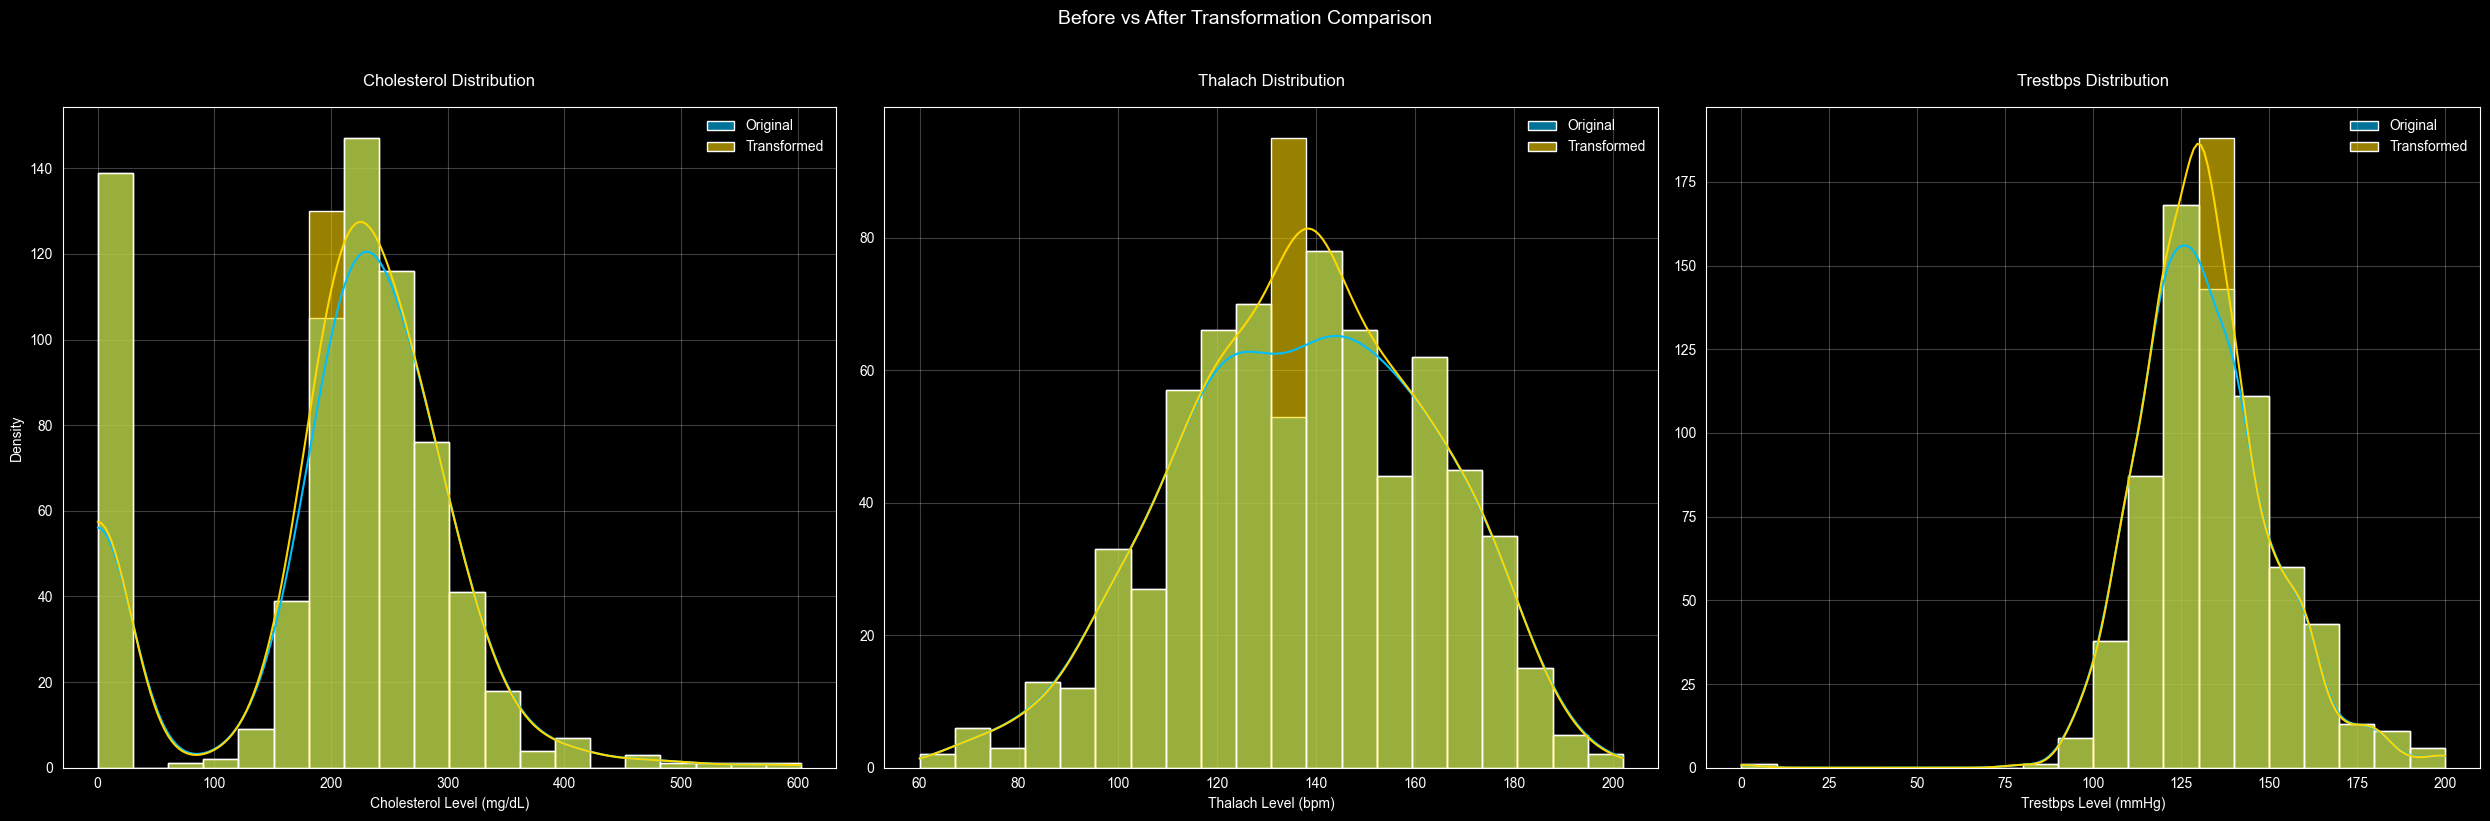

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 8))
fig.set_facecolor('black')

# Apply dark theme to both subplots
for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('black')
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.grid(True, alpha=0.3)

# Plot 1: Cholesterol comparison
sns.histplot(original_df['chol'], color='deepskyblue', kde=True, 
             label='Original', alpha=0.6, bins=20, ax=ax1)
sns.histplot(transformed_df['chol'].astype(float), color='gold', kde=True, 
             label='Transformed', alpha=0.6, bins=20, ax=ax1)
ax1.set_title('Cholesterol Distribution', pad=15, color='white')
ax1.set_xlabel('Cholesterol Level (mg/dL)')
ax1.set_ylabel('Density')
legend1 = ax1.legend(frameon=False)
plt.setp(legend1.get_texts(), color='white')  # Set legend text color

# Plot 2: Thalach comparison
sns.histplot(original_df['thalch'], color='deepskyblue', kde=True, 
             label='Original', alpha=0.6, bins=20, ax=ax2)
sns.histplot(transformed_df['thalch'].astype(float), color='gold', kde=True, 
             label='Transformed', alpha=0.6, bins=20, ax=ax2)
ax2.set_title('Thalach Distribution', pad=15, color='white')
ax2.set_xlabel('Thalach Level (bpm)')
ax2.set_ylabel('')
legend2 = ax2.legend(frameon=False)
plt.setp(legend2.get_texts(), color='white')  # Set legend text color

# Plot 3 : Trestbps comparison
sns.histplot(original_df['trestbps'], color='deepskyblue', kde=True, 
             label = 'Original', alpha=0.6, bins=20, ax=ax3)
sns.histplot(transformed_df['trestbps'].astype(float), color='gold', kde=True,
             label='Transformed', alpha=0.6, bins=20, ax=ax3)
ax3.set_title('Trestbps Distribution', pad=15, color='white')
ax3.set_xlabel('Trestbps Level (mmHg)')
ax3.set_ylabel('')
legend3 = ax3.legend(frameon=False)
plt.setp(legend3.get_texts(), color='white')  # Set legend text color

# Add main title
fig.suptitle('Before vs After Transformation Comparison', 
             y=1.02, fontsize=14, color='white')

plt.tight_layout()
plt.show()

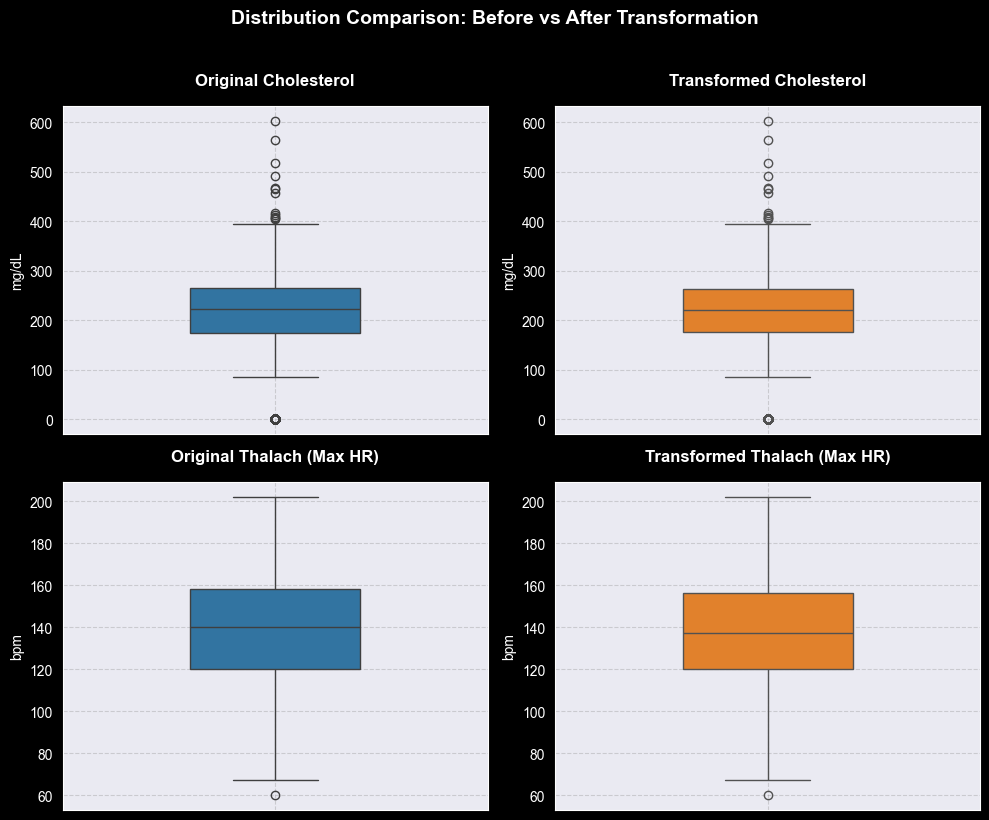

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark style
plt.style.use('dark_background')
sns.set_style("darkgrid")

# Custom palette for dark background
palette = ["#1f77b4", "#ff7f0e"]  # Blue and orange optimized for dark theme

# Create figure with 2x2 subplots
plt.figure(figsize=(10, 8), facecolor='black')

# Plot 1 - Original Cholesterol
plt.subplot(2, 2, 1)
sns.boxplot(data=original_df, y='chol', width=0.4, color=palette[0])
plt.title('Original Cholesterol', pad=15, fontweight='bold', color='white')
plt.ylabel('mg/dL', fontsize=10, color='white')
plt.grid(True, alpha=0.3, linestyle='--', color='gray')
plt.tick_params(colors='white')

# Plot 2 - Transformed Cholesterol
plt.subplot(2, 2, 2)
sns.boxplot(data=transformed_df, y='chol', width=0.4, color=palette[1])
plt.title('Transformed Cholesterol', pad=15, fontweight='bold', color='white')
plt.ylabel('mg/dL', fontsize=10, color='white')
plt.grid(True, alpha=0.3, linestyle='--', color='gray')
plt.tick_params(colors='white')

# Plot 3 - Original Thalach
plt.subplot(2, 2, 3)
sns.boxplot(data=original_df, y='thalch', width=0.4, color=palette[0])
plt.title('Original Thalach (Max HR)', pad=15, fontweight='bold', color='white')
plt.ylabel('bpm', fontsize=10, color='white')
plt.grid(True, alpha=0.3, linestyle='--', color='gray')
plt.tick_params(colors='white')

# Plot 4 - Transformed Thalach
plt.subplot(2, 2, 4)
sns.boxplot(data=transformed_df, y='thalch', width=0.4, color=palette[1])
plt.title('Transformed Thalach (Max HR)', pad=15, fontweight='bold', color='white')
plt.ylabel('bpm', fontsize=10, color='white')
plt.grid(True, alpha=0.3, linestyle='--', color='gray')
plt.tick_params(colors='white')

# Add super title and adjust layout
plt.suptitle('Distribution Comparison: Before vs After Transformation', 
             y=1.02, fontsize=14, fontweight='bold', color='white')
plt.tight_layout()
plt.show()

In [84]:
# Dealing with Missing Values of numerical columns of the datset
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('num', axis=1), data['num'], test_size=0.2, random_state=42)
numerical_cols = ['chol', 'thalch', 'trestbps']

imputer = SimpleImputer(strategy='median')

trf1 = ColumnTransformer([
    ('imputer', imputer, numerical_cols)
], remainder='passthrough')

X_train_transformed = trf1.fit_transform(X_train)   # The transformed data will have the column in the order [numerical_cols, other columns]

# Make a dataframe from the transformed data and the original data
original_df = pd.DataFrame(X_train, columns=X_train.columns)
transformed_df = pd.DataFrame(X_train_transformed, columns=numerical_cols + 
                             [col for col in X_train.columns if col not in numerical_cols])




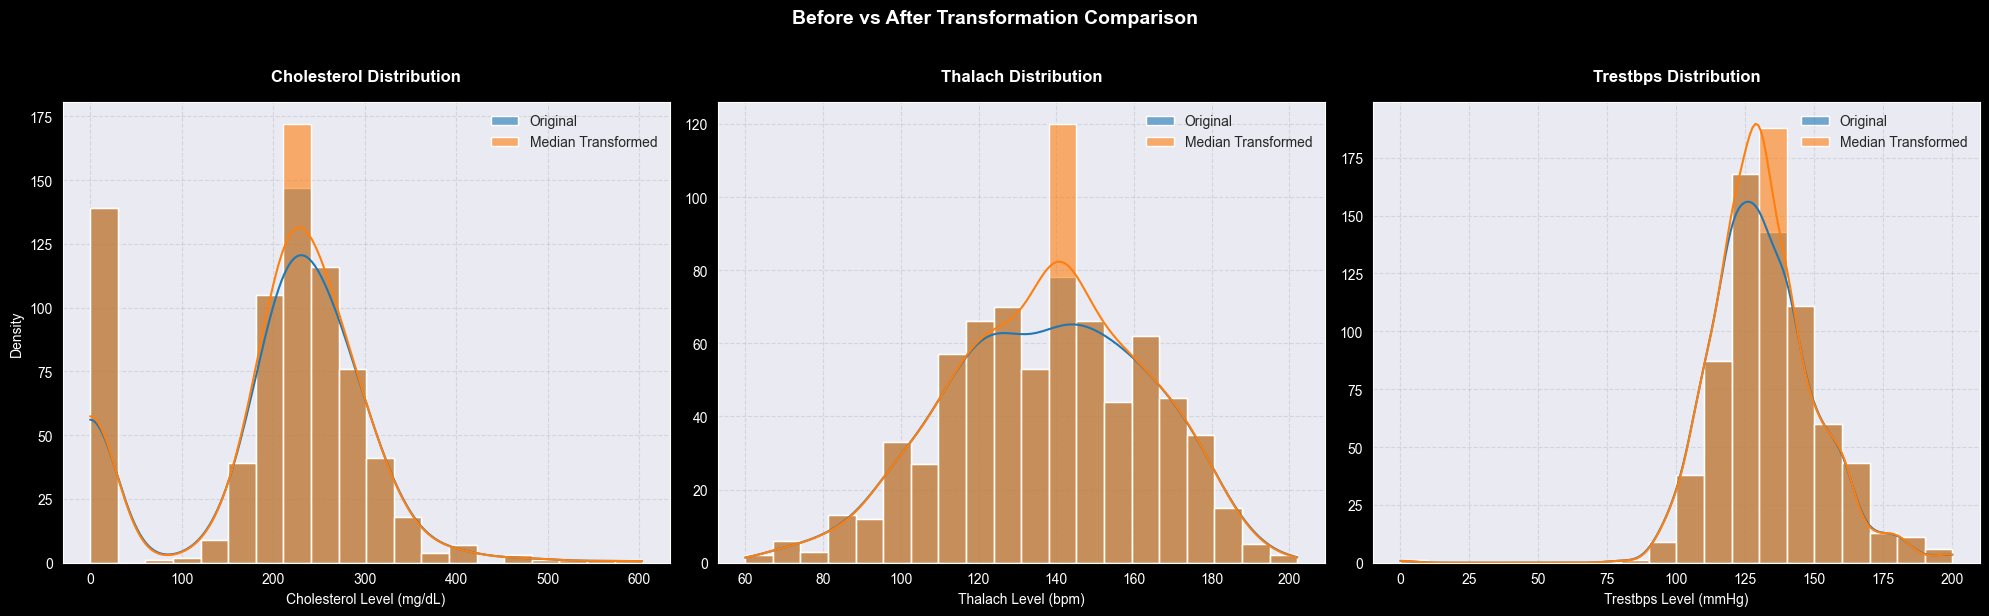

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme
plt.style.use('dark_background')
sns.set_style("darkgrid")

# Create figure with 1 row and 2 columns
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6), facecolor='black')

# Custom palette for dark background
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange optimized for dark theme

# Plot 1: Cholesterol comparison
sns.histplot(original_df['chol'], color=colors[0], kde=True, 
             label='Original', alpha=0.6, bins=20, ax=ax1)
sns.histplot(transformed_df['chol'].astype(float), color=colors[1], kde=True, 
             label='Median Transformed', alpha=0.6, bins=20, ax=ax1)
ax1.set_title('Cholesterol Distribution', pad=15, color='white', fontweight='bold')
ax1.set_xlabel('Cholesterol Level (mg/dL)', color='white')
ax1.set_ylabel('Density', color='white')
ax1.legend(frameon=False)
ax1.grid(True, alpha=0.2, linestyle='--', color='gray')

# Plot 2: Thalach comparison
sns.histplot(original_df['thalch'], color=colors[0], kde=True, 
             label='Original', alpha=0.6, bins=20, ax=ax2)
sns.histplot(transformed_df['thalch'].astype(float), color=colors[1], kde=True, 
             label='Median Transformed', alpha=0.6, bins=20, ax=ax2)
ax2.set_title('Thalach Distribution', pad=15, color='white', fontweight='bold')
ax2.set_xlabel('Thalach Level (bpm)', color='white')
ax2.set_ylabel('', color='white')  # Remove redundant y-label
ax2.legend(frameon=False)
ax2.grid(True, alpha=0.2, linestyle='--', color='gray')

# Plot 3: Trestbps comparison
sns.histplot(original_df['trestbps'], color=colors[0], kde=True, 
             label='Original', alpha=0.6, bins=20, ax=ax3)
sns.histplot(transformed_df['trestbps'].astype(float), color=colors[1], kde=True, 
             label='Median Transformed', alpha=0.6, bins=20, ax=ax3)
ax3.set_title('Trestbps Distribution', pad=15, color='white', fontweight='bold')
ax3.set_xlabel('Trestbps Level (mmHg)', color='white')
ax3.set_ylabel('', color='white')  # Remove redundant y-label
ax3.legend(frameon=False)
ax3.grid(True, alpha=0.2, linestyle='--', color='gray')

# Customize ticks and spines
for ax in [ax1, ax2, ax3]:
    ax.tick_params(colors='white')
    for spine in ax.spines.values():
        spine.set_color('white')

# Add main title
fig.suptitle('Before vs After Transformation Comparison', 
             y=1.02, fontsize=14, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

### Categorical Column 

In [2]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
        
data = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\Scikit-Learn\DATA PROCESSING\heart_disease_uci.csv")

In [3]:
data.isnull().mean()*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [28]:
# Dealing with Missing Values of categorical columns of the datset
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('num', axis=1), data['num'], test_size=0.2, random_state=42)
categorical_cols = ['restecg', 'fbs']


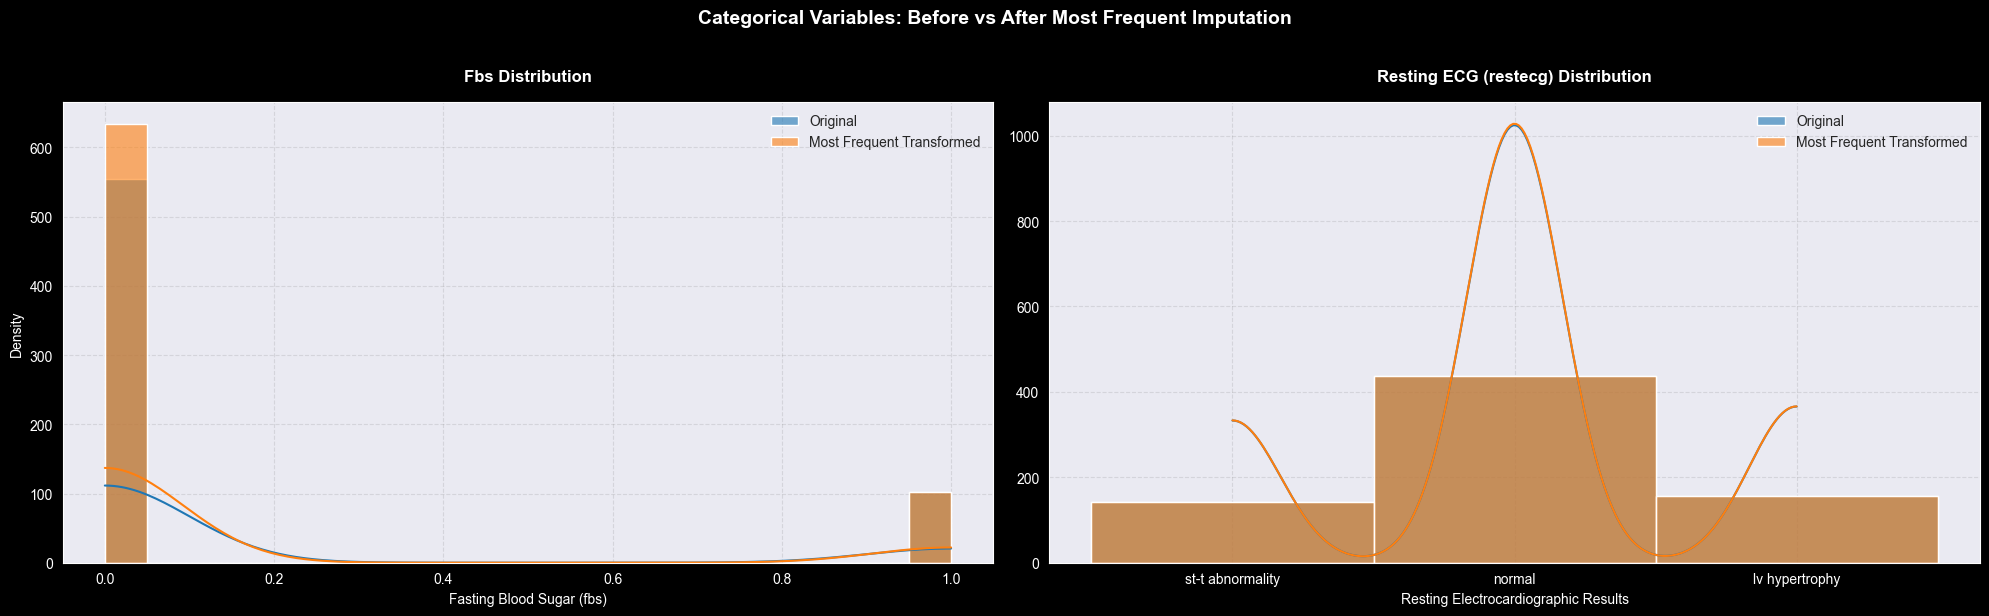

In [30]:
# Fill missing values in categorical columns with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')

trf1 = ColumnTransformer([
    ('imputer', imputer, categorical_cols)
], remainder='passthrough')

X_train_transformed = trf1.fit_transform(X_train)

# Make dataframes for comparison
# Note: ColumnTransformer changes column order, so we need to reconstruct properly
transformed_df = pd.DataFrame(X_train_transformed, 
                            columns=categorical_cols + 
                            [col for col in X_train.columns if col not in categorical_cols])
original_df = X_train.copy()  # Keep original as reference

# Compare the distributions of the original and transformed data
import matplotlib.pyplot as plt
import seaborn as sns

# Set dark theme
plt.style.use('dark_background')
sns.set_style("darkgrid")

# Create figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6), facecolor='black')

# Custom palette for dark background
colors = ['#1f77b4', '#ff7f0e']  # Blue and orange optimized for dark theme

# Plot 1: Fbs comparison
sns.histplot(original_df['fbs'], color=colors[0], kde=True, 
            label='Original', alpha=0.6, bins=20, ax=ax1)
sns.histplot(transformed_df['fbs'], color=colors[1], kde=True, 
            label='Most Frequent Transformed', alpha=0.6, bins=20, ax=ax1)

ax1.set_title('Fbs Distribution', pad=15, color='white', fontweight='bold')
ax1.set_xlabel('Fasting Blood Sugar (fbs)', color='white')
ax1.set_ylabel('Density', color='white')
ax1.legend(frameon=False)
ax1.grid(True, alpha=0.2, linestyle='--', color='gray')

# Plot 2: Restecg comparison    
sns.histplot(original_df['restecg'], color=colors[0], kde=True, 
            label='Original', alpha=0.6, bins=20, ax=ax2)
sns.histplot(transformed_df['restecg'], color=colors[1], kde=True, 
            label='Most Frequent Transformed', alpha=0.6, bins=20, ax=ax2)
ax2.set_title('Resting ECG (restecg) Distribution', pad=15, color='white', fontweight='bold')
ax2.set_xlabel('Resting Electrocardiographic Results', color='white')
ax2.set_ylabel('', color='white')
ax2.legend(frameon=False)    
ax2.grid(True, alpha=0.2, linestyle='--', color='gray')

# Add main title
fig.suptitle('Categorical Variables: Before vs After Most Frequent Imputation', 
            y=1.02, fontsize=14, color='white', fontweight='bold')

# Customize ticks and spines
for ax in [ax1, ax2]:
    ax.tick_params(colors='white')
    for spine in ax.spines.values():
        spine.set_color('white')

plt.tight_layout()
plt.show()

### KNN Imputer V/S Mean, Median 

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
        
data = pd.read_csv(r"D:\PYTON PROGRAMMING\PYTHON FILES\Scikit-Learn\DATA PROCESSING\heart_disease_uci.csv")

In [3]:
data.isnull().mean()*100

id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64

In [9]:
X = data[['chol', 'trestbps']]
y = data['num']

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of the column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train_imputed, y_train)

y_pred = regressor.predict(X_test_imputed)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean squared error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

# Using KNN Imputer
from sklearn.impute import KNNImputer   
knn = KNNImputer(n_neighbors=5)
X_train_imputed_knn = knn.fit_transform(X_train)
X_test_imputed_knn = knn.transform(X_test)

regressor.fit(X_train_imputed_knn, y_train)
y_pred_knn = regressor.predict(X_test_imputed_knn)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
print(f"Mean squared error with KNN Imputation: {mse_knn:.4f}")
print(f"R2 Score for with KNN imputation : {r2:.4f}")

Mean squared error: 1.1947
R-squared: 0.0800
Mean squared error with KNN Imputation: 1.1919
R2 Score for with KNN imputation : 0.0821


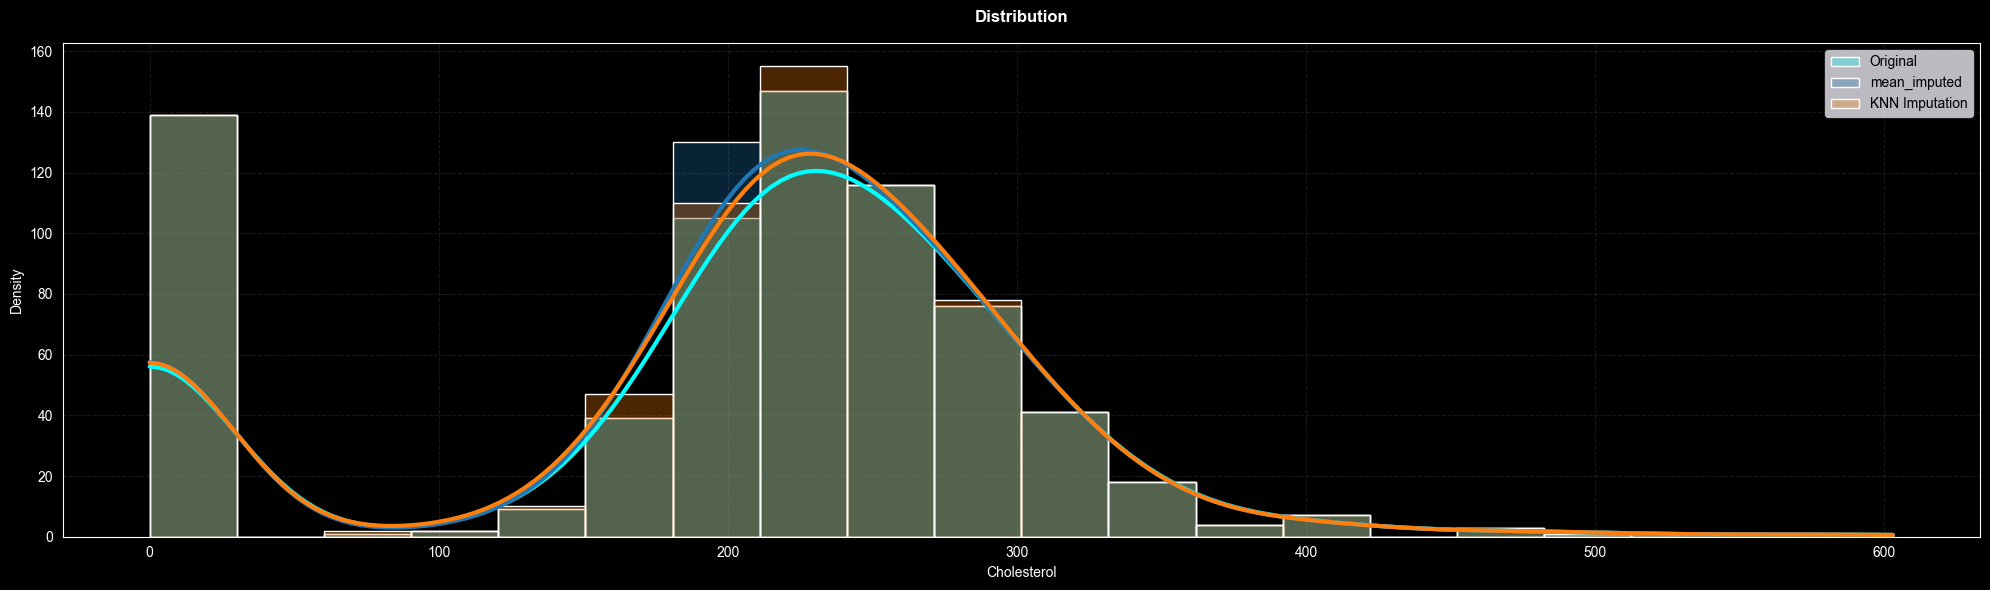

In [27]:
original_df = X_train
mean_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
knn_imputed_df = pd.DataFrame(X_train_imputed_knn, columns=X_train.columns)
# Plotting the Kernel Density Estimation plot

import matplotlib.pyplot as plt
import seaborn as sns   

# Set dark style
plt.style.use('dark_background')
sns.set_style("darkgrid")

# Create figure with 1 row and 3 columns
fig, (ax1) = plt.subplots(1, 1, figsize=(20, 6), facecolor='black')
ax1.set_facecolor('black')

# Custom palette for dark background
colors = ['#1f77b4', '#ff7f0e', 'cyan']  # Blue and orange optimized for dark theme

# Plot 1: Cholesterol comparison
sns.histplot(original_df['chol'], color=colors[2], kde=True, 
            label='Original', alpha=0.3, bins=20, ax=ax1, line_kws={'linewidth': 3})
sns.histplot(mean_imputed_df['chol'], color=colors[0], kde=True, 
            label='mean_imputed', alpha=0.3, bins=20, ax=ax1, line_kws={'linewidth': 3})
sns.histplot(knn_imputed_df['chol'], color=colors[1], kde=True, 
            label='KNN Imputation', alpha=0.3, bins=20, ax=ax1, line_kws={'linewidth': 3})

ax1.set_title('Distribution', pad=15, color='white', fontweight='bold')
ax1.set_xlabel('Cholesterol', color='white')
ax1.set_ylabel('Density', color='white')
ax1.legend(frameon=False)
ax1.grid(True, alpha=0.2, linestyle='--', color='gray')
ax1.tick_params(colors='white')
for spine in ax1.spines.values():
    spine.set_color('white')

legend = plt.legend()
plt.setp(legend.get_texts(), color='black')
plt.setp(legend.get_title(), color='gray') # Set legend text color
plt.tight_layout()
plt.show()